<a href="https://colab.research.google.com/github/alfredwisana/deep-learning/blob/main/week%203%3A%20CNN/data_100_percent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split

2024-03-05 17:31:28.205123: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-05 17:31:28.389679: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 17:31:28.389721: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 17:31:28.416771: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 17:31:28.466640: I tensorflow/core/platform/cpu_feature_guar

READ DATA

In [9]:
(train_data, test_data), ds_info = tfds.load(name="emnist/digits",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True, # Data gets returned in tuple format (data, label)
                                             with_info=True)

2024-03-05 17:36:38.447151: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: HTTP response code 302".


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [06:23<00:00, 382.29s/ url]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]2024-03-05 17:43:06.476810: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 17:43:06.572653: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 17:43:06.572709: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 17:43:06.576013: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA n

Dataset emnist downloaded and prepared to /home/alfred/tensorflow_datasets/emnist/digits/3.0.0. Subsequent calls will reuse this data.


In [11]:
len (test_data)

40000

In [21]:
train_data = train_data.concatenate(test_data)

In [54]:

train_data_list = list(train_data)

# Write the serialized tensor to a file
with open('tensor.pkl', 'wb') as f:
    pickle.dump(train_data_list ,f)

In [23]:
dataset = []
for image, label in tfds.as_numpy(train_data):
  dataset.append({
      'image' : image,
      'label' : int(label)
  })

In [2]:
import pickle

In [24]:
with open('dataset_concat.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [4]:
with open('dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [25]:
X = []
Y = []
for i in range(len(dataset)):
  X.append(tf.cast(dataset[i]['image'], tf.float32) / 255)
  Y.append(tf.one_hot(dataset[i]['label'], depth=10))

X = np.array(X)
Y = np.array(Y)

In [26]:
with open('datax_concat.pkl','wb') as f:
    pickle.dump(X, f)

with open('datay_concat.pkl','wb') as f:
    pickle.dump(Y, f)

In [6]:
with open('datax.pkl','rb') as f:
    X = pickle.load(f)
with open('datay.pkl','rb') as f:
    Y = pickle.load(f)

In [27]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
with open('x_train.pkl','wb') as f:
    pickle.dump(Xtrain, f)

with open('y_train.pkl','wb') as f:
    pickle.dump(Ytrain, f)

with open('x_test.pkl','wb') as f:
    pickle.dump(Xtest, f)

with open('y_test.pkl','wb') as f:
    pickle.dump(Ytest, f)

In [ ]:
with open('x_train_concat.pkl','rb') as f:
    Xtrain = pickle.load(f)
with open('y_train_concat.pkl','rb') as f:
    Ytrain = pickle.load(f)

with open('x_test_concat.pkl','rb') as f:
    Xtest = pickle.load(f)
with open('y_test_concat.pkl','rb') as f:
    Ytest = pickle.load(f)

Data Plotting

In [29]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

Alexnet

In [35]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(28,28,1)),
        keras.layers.Conv2D(96, kernel_size=(3,3), strides=(1,1), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(256, kernel_size=(5,5), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 96)        960       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 5, 5, 384)         885120    
                                                                 
 conv2d_10 (Conv2D)          (None, 5, 5, 384)        

In [36]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [37]:
history_alexnet = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10


2024-03-05 18:10:41.814688: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-05 18:10:42.014926: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-05 18:10:42.508663: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-05 18:10:42.979913: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8d59cf8a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-05 18:10:42.979945: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-03-05 18:10:43.005577: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709637043.219781   88362 devic

14000/14000 [==============================] - 172s 12ms/step - loss: 0.1211 - accuracy: 0.9684 - val_loss: 0.0527 - val_accuracy: 0.9880
Epoch 2/10
14000/14000 [==============================] - 171s 12ms/step - loss: 0.0735 - accuracy: 0.9840 - val_loss: 0.0552 - val_accuracy: 0.9865
Epoch 3/10
14000/14000 [==============================] - 174s 12ms/step - loss: 0.0707 - accuracy: 0.9845 - val_loss: 0.0503 - val_accuracy: 0.9870
Epoch 4/10
14000/14000 [==============================] - 177s 13ms/step - loss: 0.0675 - accuracy: 0.9850 - val_loss: 0.0575 - val_accuracy: 0.9876
Epoch 5/10
14000/14000 [==============================] - 176s 13ms/step - loss: 0.0691 - accuracy: 0.9848 - val_loss: 0.0498 - val_accuracy: 0.9892
Epoch 6/10
14000/14000 [==============================] - 175s 13ms/step - loss: 0.0736 - accuracy: 0.9837 - val_loss: 0.0600 - val_accuracy: 0.9879
Epoch 7/10
14000/14000 [==============================] - 177s 13ms/step - loss: 0.0698 - accuracy: 0.9846 - val_loss

In [38]:
with open('history_alexnet_concat.pkl', 'wb') as f:
    pickle.dump(history_alexnet, f)

In [15]:
with open('data_100persen/history_alexnet.pkl', 'rb') as f:
    history_alexnet = pickle.load(f)

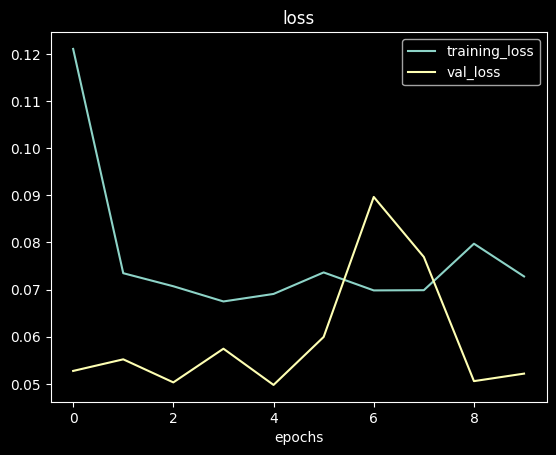

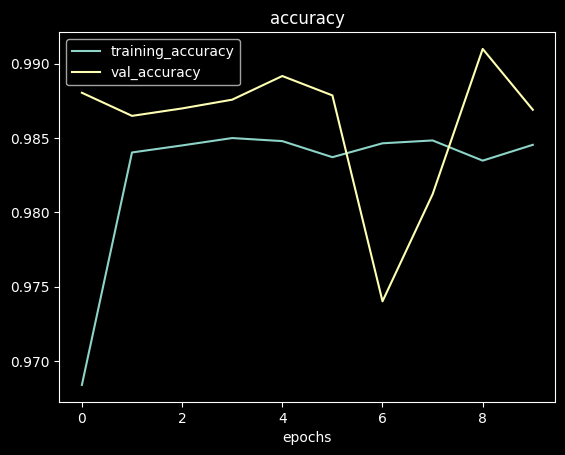

In [39]:
plot_loss_curves(history_alexnet)

LENET

In [40]:
model = keras.models.Sequential(
    [
      keras.layers.Input((28,28,1)),
      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dense(84, activation='sigmoid'),
      keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [41]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [42]:
history_lenet = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

Epoch 1/10
14000/14000 [==============================] - 80s 5ms/step - loss: 0.1936 - accuracy: 0.9402 - val_loss: 0.0544 - val_accuracy: 0.9835
Epoch 2/10
14000/14000 [==============================] - 78s 6ms/step - loss: 0.0485 - accuracy: 0.9852 - val_loss: 0.0456 - val_accuracy: 0.9859
Epoch 3/10
14000/14000 [==============================] - 78s 6ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0376 - val_accuracy: 0.9883
Epoch 4/10
14000/14000 [==============================] - 79s 6ms/step - loss: 0.0300 - accuracy: 0.9911 - val_loss: 0.0324 - val_accuracy: 0.9905
Epoch 5/10
14000/14000 [==============================] - 88s 6ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0318 - val_accuracy: 0.9907
Epoch 6/10
14000/14000 [==============================] - 80s 6ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0373 - val_accuracy: 0.9894
Epoch 7/10
14000/14000 [==============================] - 79s 6ms/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0

In [43]:
with open('history_lenet_concat.pkl', 'wb') as f:
    pickle.dump(history_lenet, f)

In [21]:
with open('history_lenet.pkl', 'rb') as f:
    history_lenet = pickle.load(f)

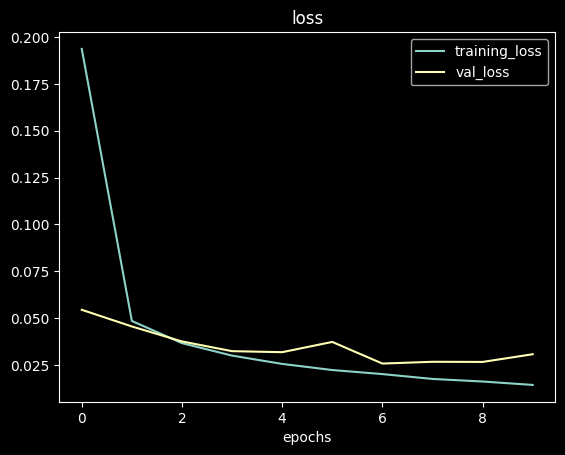

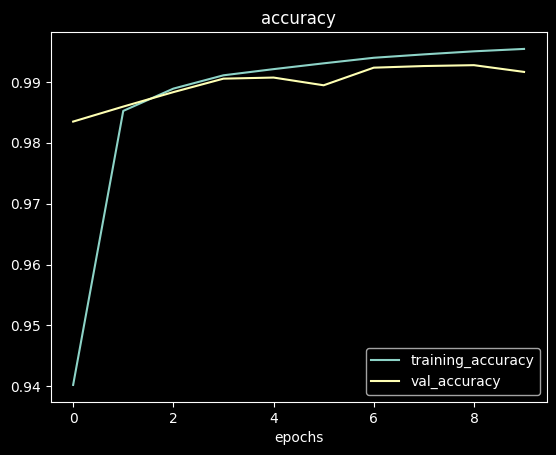

In [44]:
plot_loss_curves(history_lenet)

CUSTOM MODEL

In [ ]:
model = keras.models.Sequential(
    [
      keras.layers.Input((28,28,1)),
      
      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dense(84, activation='sigmoid'),
      
      keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_custom = model.fit(Xtrain, Ytrain,epochs=10, batch_size=16, validation_data=(Xtest,Ytest))

In [ ]:
with open('history_custom.pkl', 'wb') as f:
    pickle.dump(history_custom, f)

In [ ]:
with open('history_lenet.pkl', 'rb') as f:
    history_custom = pickle.load(f)

In [ ]:
plot_loss_curves(history_custom)